pandas.svg

Pandas es una librería de Python utiliada para creación de estructuras de datos, manipulación y análisis de los mismos. Su nombre viene de Panel Datas lo que implica que la información almacenada en sus estructuras se trabaja de forma tabular.



## Importación de librerías
Para utilizar la librería de Pandas y de Matplotlib es necesario importarlas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Estructuras de datos - DataFrame
El data frame es una de las estructuras de Pandas más versátiles y útiles. Están compuestos de 3 elementos:


1.   Índices
2.   Columnas
3.   Datos

Actúan como una tabla en una base de datos que puede ser filtrada y modificada conforme sea necesario.

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/menene/euro2024/main/uefa_euro_matches.csv",
    encoding="utf8",
)

## Análisis exploratorio

In [15]:
df.shape

(286, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  286 non-null    object
 1   HomeTeamName          286 non-null    object
 2   AwayTeamName          286 non-null    object
 3   HomeTeamGoals         286 non-null    int64 
 4   AwayTeamGoals         286 non-null    int64 
 5   Stage                 286 non-null    object
 6   SpecialWinConditions  33 non-null     object
 7   Stadium               286 non-null    object
 8   City                  286 non-null    object
 9   Attendance            286 non-null    int64 
 10  Year                  286 non-null    int64 
 11  Result                286 non-null    object
dtypes: int64(4), object(8)
memory usage: 26.9+ KB


In [17]:
df.describe()

,HomeTeamGoals,AwayTeamGoals,Attendance,Year
count,286.000000,286.000000,286.000000,286.000000
mean,1.293706,1.108392,40220.321678,1999.804196
std,1.180735,1.045693,15744.718423,13.915665
min,0.000000,0.000000,1659.000000,1960.000000
25%,0.000000,0.000000,29220.000000,1992.000000
50%,1.000000,1.000000,38746.500000,2004.000000
75%,2.000000,2.000000,50489.000000,2012.000000
max,6.000000,5.000000,79115.000000,2016.000000


In [18]:
df.head()

,Date,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,Stage,SpecialWinConditions,Stadium,City,Attendance,Year,Result
0,1960-07-06,France,Yugoslavia,4,5,Semi-finals,NaN,Parc des Princes,Paris,26370,1960,Away Win
1,1960-07-06,Czechoslovakia,Soviet Union,0,3,Semi-finals,NaN,Stade Vélodrome,Marseille,25184,1960,Away Win
2,1960-07-09,Czechoslovakia,France,2,0,Third place play-off,NaN,Stade Vélodrome,Marseille,9438,1960,Home Win
3,1960-07-10,Soviet Union,Yugoslavia,2,1,Final,Soviet Union win after extra time,Parc des Princes,Paris,17966,1960,Home Win
4,1964-06-17,Spain,Hungary,2,1,Semi-finals,Spain win after extra time,Santiago Bernabéu,Madrid,34713,1964,Home Win


## Manipulación de datos
Parte fundamental del trabajo con datos es la manipulación de los mismos. Tareas como limpiar la información para que esté en el formato necesario tanto para su manejo como para la optimización y las políticas de manejo de datos faltantes son necesarias para obtener los mejores resultados.

In [4]:
df["HomeTeamName"] = df["HomeTeamName"].str.rstrip()
df["AwayTeamName"] = df["AwayTeamName"].str.lstrip()

## Creación de columnas
Por el análisis exploratorio que se realizó sobre los datos, es evidente la necesidad de crear una columna adicional con información útil para facilitar calculos posteriores.

In [5]:
def result(row):
    if row["HomeTeamGoals"] > row["AwayTeamGoals"]:
        return "Home Win"
    elif row["HomeTeamGoals"] < row["AwayTeamGoals"]:
        return "Away Win"
    else:
        return "Draw"

# el parametro de axis = 1 hace referencia
# a que la operación debe aplicarse a
# cada una de las filas

df["Result"] = df.apply(result, axis=1)

df

,Date,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,Stage,SpecialWinConditions,Stadium,City,Attendance,Year,Result
0,1960-07-06,France,Yugoslavia,4,5,Semi-finals,NaN,Parc des Princes,Paris,26370,1960,Away Win
1,1960-07-06,Czechoslovakia,Soviet Union,0,3,Semi-finals,NaN,Stade Vélodrome,Marseille,25184,1960,Away Win
2,1960-07-09,Czechoslovakia,France,2,0,Third place play-off,NaN,Stade Vélodrome,Marseille,9438,1960,Home Win
3,1960-07-10,Soviet Union,Yugoslavia,2,1,Final,Soviet Union win after extra time,Parc des Princes,Paris,17966,1960,Home Win
4,1964-06-17,Spain,Hungary,2,1,Semi-finals,Spain win after extra time,Santiago Bernabéu,Madrid,34713,1964,Home Win
...,...,...,...,...,...,...,...,...,...,...,...,...
281,2016-07-02,Germany,Italy,1,1,Quarter-finals,Germany win on Penalities 6–5,Nouveau Stade de Bordeaux,Bordeaux,38764,2016,Draw
282,2016-07-03,France,Iceland,5,2,Quarter-finals,NaN,Stade de France,Saint-Denis,76833,2016,Home Win
283,2016-07-06,Portugal,Wales,2,0,Semi-finals,NaN,Parc Olympique Lyonnais,Décines-Charpieu,55679,2016,Home Win
284,2016-07-07,Germany,France,0,2,Semi-finals,NaN,Stade Vélodrome,Marseille,64078,2016,Away Win


## Creación de estructuras nuevas

In [6]:
home_team_performance = (
    df.groupby("HomeTeamName")
    .agg(
        home_matches_played=("HomeTeamName", "size"),
        home_goals_scored=("HomeTeamGoals", "sum"),
        home_goals_conceded=("AwayTeamGoals", "sum"),
        home_wins=("Result", lambda x: (x == "Home Win").sum()),
        home_draws=("Result", lambda x: (x == "Draw").sum()),
        home_losses=("Result", lambda x: (x == "Away Win").sum()),
    )
    .reset_index()
)

# se renombra la columna para homologar el nomre de la columna
home_team_performance.rename(columns={"HomeTeamName": "Team"}, inplace=True)

home_team_performance

,Team,home_matches_played,home_goals_scored,home_goals_conceded,home_wins,home_draws,home_losses
0,Albania,1,0,1,0,0,1
1,Austria,4,1,5,0,1,3
2,Belgium,8,12,9,4,1,3
3,Bulgaria,2,1,2,1,0,1
4,CIS,1,1,1,0,1,0
5,Croatia,9,12,14,3,2,4
6,Czech Republic,11,14,14,5,1,5
7,Czechoslovakia,6,8,8,2,2,2
8,Denmark,14,19,22,3,5,6
9,England,14,16,16,5,3,6


In [7]:
away_team_performance = (
    df.groupby("AwayTeamName")
    .agg(
        away_matches_played=("AwayTeamName", "size"),
        away_goals_scored=("AwayTeamGoals", "sum"),
        away_goals_conceded=("HomeTeamGoals", "sum"),
        away_wins=("Result", lambda x: (x == "Away Win").sum()),
        away_draws=("Result", lambda x: (x == "Draw").sum()),
        away_losses=("Result", lambda x: (x == "Home Win").sum()),
    )
    .reset_index()
)

# idem con lo anterior
away_team_performance.rename(columns={"AwayTeamName": "Team"}, inplace=True)

away_team_performance

,Team,away_matches_played,away_goals_scored,away_goals_conceded,away_wins,away_draws,away_losses
0,Albania,2,1,2,1,0,1
1,Austria,2,1,2,0,1,1
2,Belgium,9,10,16,3,1,5
3,Bulgaria,4,3,11,0,1,3
4,CIS,2,0,3,0,1,1
5,Croatia,9,11,6,5,3,1
6,Czech Republic,13,16,19,5,2,6
7,Czechoslovakia,2,4,2,1,1,0
8,Denmark,13,11,21,4,1,8
9,England,17,24,19,5,8,4


## Union de estructuras

In [8]:
team_performance = pd.merge(home_team_performance, away_team_performance, on="Team")

team_performance

,Team,home_matches_played,home_goals_scored,home_goals_conceded,home_wins,home_draws,home_losses,away_matches_played,away_goals_scored,away_goals_conceded,away_wins,away_draws,away_losses
0,Albania,1,0,1,0,0,1,2,1,2,1,0,1
1,Austria,4,1,5,0,1,3,2,1,2,0,1,1
2,Belgium,8,12,9,4,1,3,9,10,16,3,1,5
3,Bulgaria,2,1,2,1,0,1,4,3,11,0,1,3
4,CIS,1,1,1,0,1,0,2,0,3,0,1,1
5,Croatia,9,12,14,3,2,4,9,11,6,5,3,1
6,Czech Republic,11,14,14,5,1,5,13,16,19,5,2,6
7,Czechoslovakia,6,8,8,2,2,2,2,4,2,1,1,0
8,Denmark,14,19,22,3,5,6,13,11,21,4,1,8
9,England,14,16,16,5,3,6,17,24,19,5,8,4


## Agregaciones

In [9]:
team_performance["total_matches_played"] = (
    team_performance["home_matches_played"] + team_performance["away_matches_played"]
)

team_performance["total_goals_scored"] = (
    team_performance["home_goals_scored"] + team_performance["away_goals_scored"]
)

team_performance["total_goals_conceded"] = (
    team_performance["home_goals_conceded"] + team_performance["away_goals_conceded"]
)

team_performance["total_wins"] = (
    team_performance["home_wins"] + team_performance["away_wins"]
)

team_performance["total_draws"] = (
    team_performance["home_draws"] + team_performance["away_draws"]
)

team_performance["total_losses"] = (
    team_performance["home_losses"] + team_performance["away_losses"]
)

## Análisis de datos

In [10]:
team_performance["win_rate"] = (
    team_performance["total_wins"] / team_performance["total_matches_played"]
)

top_teams = team_performance.sort_values(by="win_rate", ascending=False).head(10)

top_teams

,Team,home_matches_played,home_goals_scored,home_goals_conceded,home_wins,home_draws,home_losses,away_matches_played,away_goals_scored,away_goals_conceded,away_wins,away_draws,away_losses,total_matches_played,total_goals_scored,total_goals_conceded,total_wins,total_draws,total_losses,win_rate
35,Wales,3,6,2,3,0,0,3,4,4,1,0,2,6,10,6,4,0,2,0.666667
36,West Germany,9,14,7,5,2,2,6,11,6,4,2,0,15,25,13,9,4,2,0.600000
29,Soviet Union,3,4,3,2,0,1,10,13,9,5,2,3,13,17,12,7,2,4,0.538462
22,Portugal,17,24,14,9,5,3,18,25,17,9,4,5,35,49,31,18,9,8,0.514286
11,France,24,46,27,14,5,5,15,16,17,6,4,5,39,62,44,20,9,10,0.512821
12,Germany,17,25,16,8,5,4,17,22,19,9,3,5,34,47,35,17,8,9,0.500000
18,Netherlands,20,35,22,10,4,6,15,22,15,7,4,4,35,57,37,17,8,10,0.485714
30,Spain,18,27,11,9,5,4,22,28,25,10,6,6,40,55,36,19,11,10,0.475000
5,Croatia,9,12,14,3,2,4,9,11,6,5,3,1,18,23,20,8,5,5,0.444444
16,Italy,20,24,8,11,8,1,18,15,19,5,8,5,38,39,27,16,16,6,0.421053


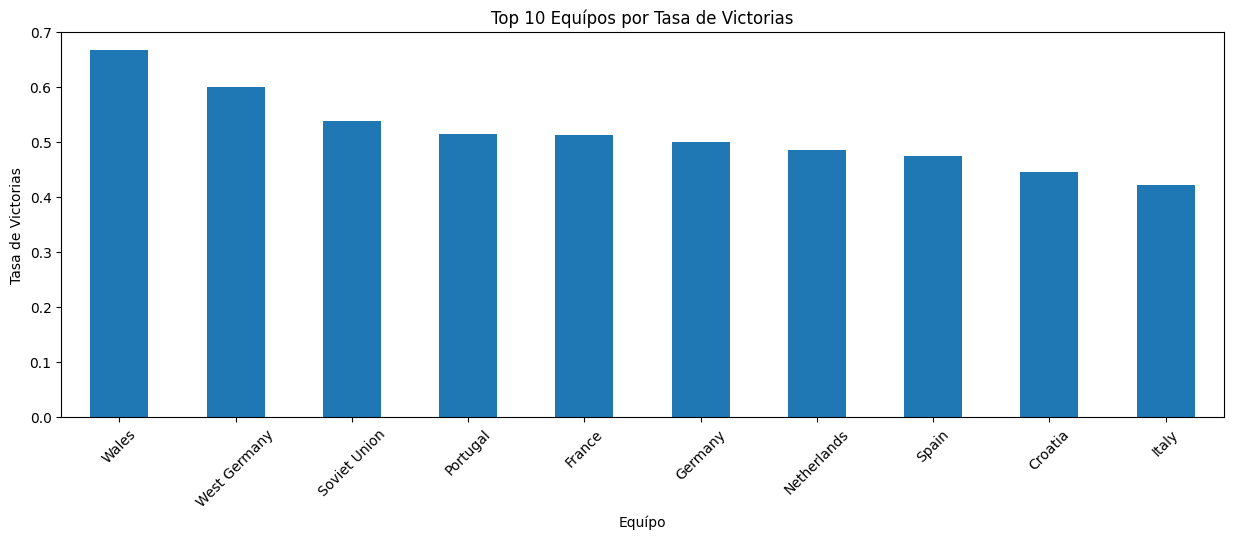

In [11]:
top_teams.plot(x="Team", y="win_rate", kind="bar", rot=45, legend=False, figsize=(15,5))
plt.title("Top 10 Equípos por Tasa de Victorias")
plt.xlabel("Equípo")
plt.ylabel("Tasa de Victorias")
plt.show()

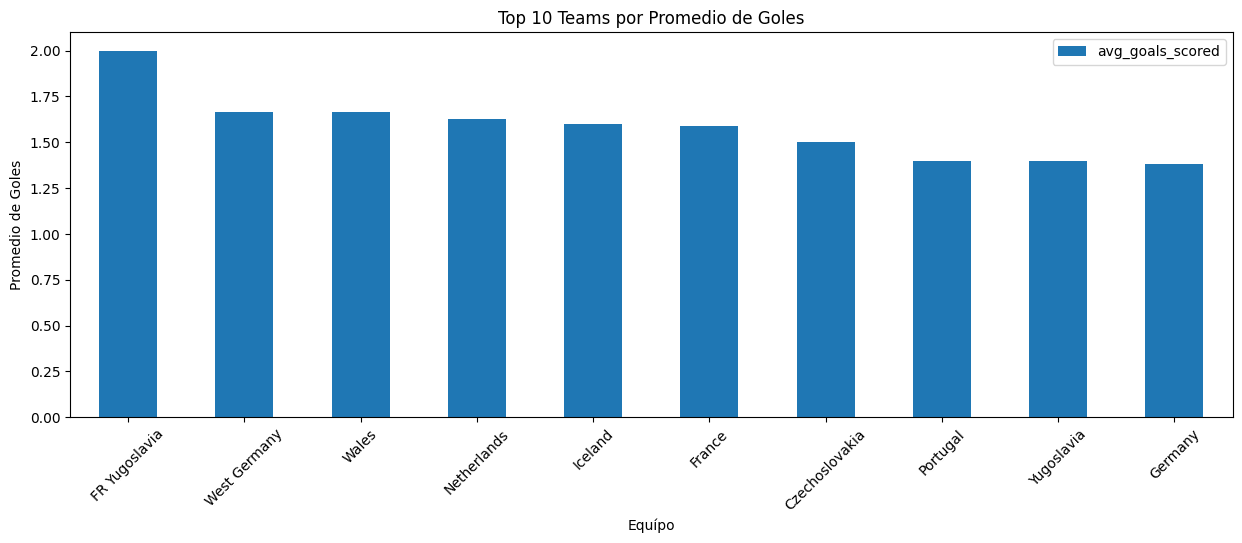

In [12]:
team_performance["avg_goals_scored"] = (
    team_performance["total_goals_scored"] / team_performance["total_matches_played"]
)

top_scoring_teams = team_performance.sort_values(
    by="avg_goals_scored", ascending=False
).head(10)

top_scoring_teams.plot(x="Team", y="avg_goals_scored", kind="bar", rot=45, figsize=(15, 5))
plt.title("Top 10 Teams por Promedio de Goles")
plt.xlabel("Equípo")
plt.ylabel("Promedio de Goles")
plt.show()

## Análisis de tendencias

In [13]:
trend_analysis = (
    df.groupby("Year")
    .agg(
        total_matches=("Year", "size"),
        avg_home_goals=("HomeTeamGoals", "mean"),
        avg_away_goals=("AwayTeamGoals", "mean"),
    )
    .reset_index()
)

trend_analysis

,Year,total_matches,avg_home_goals,avg_away_goals
0,1960,4,2.000000,2.250000
1,1964,4,1.750000,1.500000
2,1968,5,1.200000,0.200000
3,1972,4,1.250000,1.250000
4,1976,4,2.500000,2.250000
5,1980,14,0.857143,1.071429
6,1984,15,2.000000,0.733333
7,1988,15,1.066667,1.200000
8,1992,15,1.266667,0.866667
9,1996,31,0.935484,1.129032


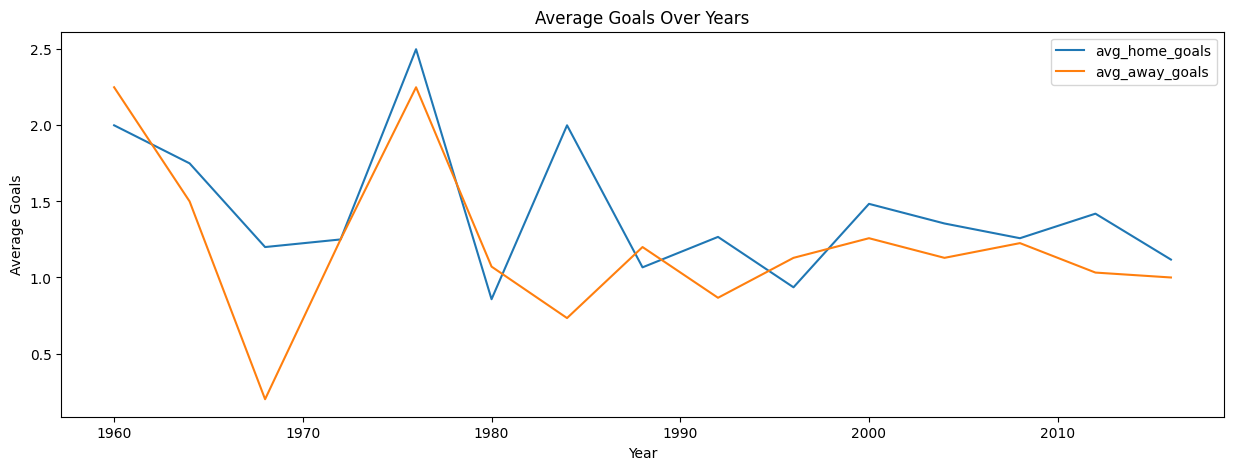

In [14]:
trend_analysis.plot(x="Year", y=["avg_home_goals", "avg_away_goals"], kind="line", figsize=(15, 5))
plt.title("Average Goals Over Years")
plt.xlabel("Year")
plt.ylabel("Average Goals")
plt.show()